The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


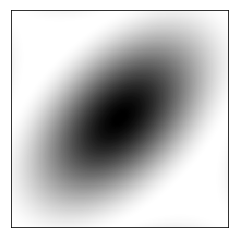

In [103]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import i0
# from htmresearch.support.gridcells.gridunions.hypermodule import *
from htmresearch.support.gridcells.gridunions.utils import *
%load_ext autoreload
%autoreload 2



B = create_basis(0., np.pi/3.)
# B = np.eye(2) 

# def smooth_phase_dist(p, q):
#     d = np.minimum( np.absolute(p - q), 1. - np.absolute(p-q))
#     d = np.linalg.norm(d)
#     d = smoothstep(2.*d)
#     return d


def map_to_torus(x, B):
    B_ = np.linalg.inv(B)
    return np.dot(x, B_.T)%1


def smooth_phase_dist(p, q, B=None):
    offsets = np.array([(0.,0.), (1.,0.), (1.,1.),(0.,1.),(-1.,1.),(-1.,0.),(-1.,-1.),(0.,-1.), (1.,-1.)])
    D = offsets + q - p

    if B is not None:
        D = np.dot(D, B.T)

    d = np.amin( np.linalg.norm(D, axis=1))
    d = smoothstep(2.*d)
    return d



D  = np.zeros((200,200))


x = np.linspace(-.5,.5, num=img.shape[0])
y = np.linspace(-.5,.5, num=img.shape[1])



for i in range(len(x)):
    for j in range(len(y)):
        p_0 = np.array([0.0, 0.0])
        p = np.array([x[i], y[j]])%1
#         p = map_to_torus(np.array([x[i], y[j]]), B)
        d = smooth_phase_dist(p_0, p, B)
        D [i,j]  = d


# plt.figure(figsize=(10,10))
plt.imshow(-D, cmap="binary")
plt.xticks([])
plt.yticks([])
plt.show()
# plt.plot(D[100])



